# Анализ полносвязной нейронной сети

In [434]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from MLP import NeuralNetwork, mse

## Вывод формул градиентов

### 1. Градиент на выходном слое
$$
\frac{\partial \mathcal{L}}{\partial Z^{[L]}} = A^{[L]} - y
$$

### 2. Градиенты параметров слоя
#### Градиент по весам:
$$
\frac{\partial \mathcal{L}}{\partial W^{[l]}} = \frac{1}{m} A^{[l-1]^T} \frac{\partial \mathcal{L}}{\partial Z^{[l]}}
$$

#### Градиент по смещениям:
$$
\frac{\partial \mathcal{L}}{\partial b^{[l]}} = \frac{1}{m} \sum_{i=1}^m \frac{\partial \mathcal{L}}{\partial Z_i^{[l]}}
$$

### 3. Распространение градиента

#### Градиент по активациям:
$$
\frac{\partial \mathcal{L}}{\partial A^{[l-1]}} = \frac{\partial \mathcal{L}}{\partial Z^{[l]}} W^{[l]^T}
$$

#### Градиент через функцию активации:
$$
\frac{\partial \mathcal{L}}{\partial Z^{[l]}} = \frac{\partial \mathcal{L}}{\partial A^{[l]}} \odot g'(Z^{[l]})
$$

### 4. Производные активаций

#### ReLU:
$$
g'(z) = \begin{cases} 
1 & \text{если } z > 0 \\
0 & \text{иначе}
\end{cases}
$$

#### Сигмоида:
$$
\sigma'(z) = \sigma(z)(1 - \sigma(z))
$$

### 5. Обновление параметров

$$
W^{[l]} = W^{[l]} - \eta \frac{\partial \mathcal{L}}{\partial W^{[l]}}
$$
$$
b^{[l]} = b^{[l]} - \eta \frac{\partial \mathcal{L}}{\partial b^{[l]}}
$$

## x + шум

### Подготовка данных

In [435]:
X = np.random.rand(1000, 1) * 10
y = X + np.random.normal(0, 1, X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Обучение: 1x32x1
Epoch 10/1000, Loss: 1.1138
Epoch 20/1000, Loss: 1.0694
Epoch 30/1000, Loss: 1.0567
Epoch 40/1000, Loss: 1.0549
Epoch 50/1000, Loss: 1.0503
Epoch 60/1000, Loss: 1.0501
Epoch 70/1000, Loss: 1.0482
Epoch 80/1000, Loss: 1.0478
Epoch 90/1000, Loss: 1.0472
Epoch 100/1000, Loss: 1.0471
Epoch 110/1000, Loss: 1.0468
Epoch 120/1000, Loss: 1.0463
Epoch 130/1000, Loss: 1.0465
Epoch 140/1000, Loss: 1.0464
Epoch 150/1000, Loss: 1.0461
Epoch 160/1000, Loss: 1.0456
Epoch 170/1000, Loss: 1.0458
Epoch 180/1000, Loss: 1.0457
Epoch 190/1000, Loss: 1.0459
Epoch 200/1000, Loss: 1.0459
Epoch 210/1000, Loss: 1.0454
Epoch 220/1000, Loss: 1.0455
Epoch 230/1000, Loss: 1.0454
Epoch 240/1000, Loss: 1.0455
Epoch 250/1000, Loss: 1.0463
Epoch 260/1000, Loss: 1.0450
Epoch 270/1000, Loss: 1.0465
Epoch 280/1000, Loss: 1.0456
Epoch 290/1000, Loss: 1.0453
Epoch 300/1000, Loss: 1.0458
Epoch 310/1000, Loss: 1.0447
Epoch 320/1000, Loss: 1.0460
Epoch 330/1000, Loss: 1.0456
Epoch 340/1000, Loss: 1.0448
Epoch

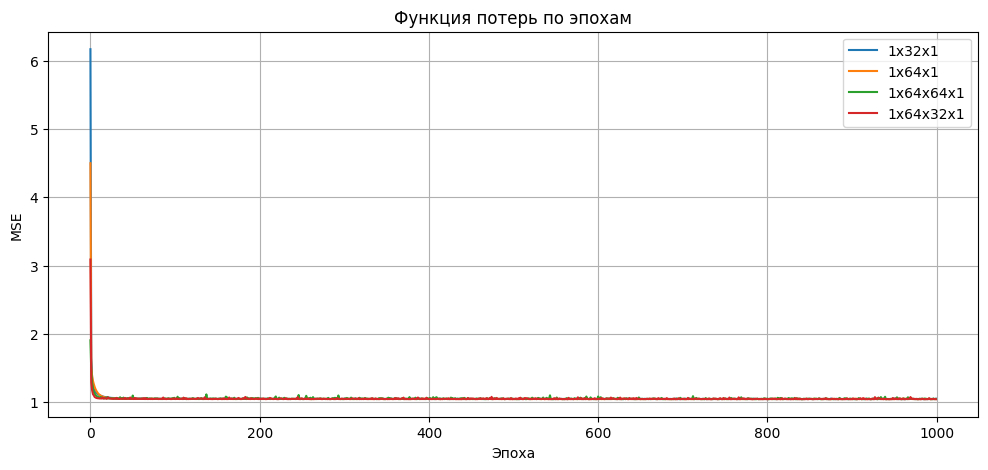

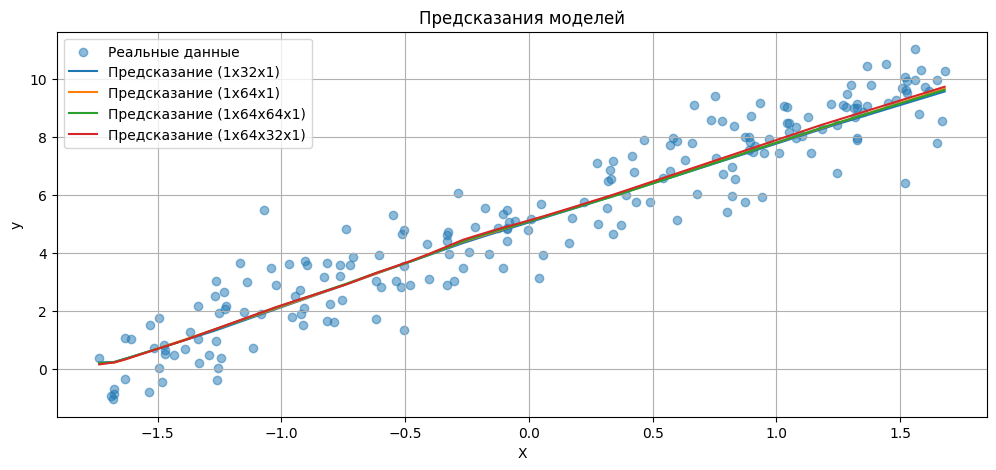

In [436]:
input_layer_size = X_train.shape[1]

architectures = {
    '1x32x1': [input_layer_size, 32, 1],
    '1x64x1': [input_layer_size, 64, 1],
    '1x64x64x1': [input_layer_size, 64, 64, 1],  
    '1x64x32x1': [input_layer_size, 64, 32, 1]
}

results = {}

for name, layer_sizes in architectures.items():
    print(f"\nОбучение: {name}")
    model = NeuralNetwork(layer_sizes, activation='relu', task='regression')
    losses = model.train(X_train_scaled, y_train, epochs=1000, batch_size=32, learning_rate=0.01)
    y_pred = model.predict(X_test_scaled)
    loss = mse(y_test, y_pred)
    
    key = f"{name}"
    results[key] = {
        'loss': loss,
        'losses': losses,
        'architecture': layer_sizes,
        'parameters': model.parameters 
    }
    print(f"Test MSE: {loss:.5f}")
    
plt.figure(figsize=(12, 5))
for name, res in results.items():
    plt.plot(res['losses'], label=name)

plt.title("Функция потерь по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

sorted_indices = np.argsort(X_test_scaled[:, 0])
X_test_sorted = X_test_scaled[sorted_indices]
y_test_sorted = y_test[sorted_indices]

plt.figure(figsize=(12, 5))
plt.scatter(X_test_sorted, y_test_sorted, alpha=0.5, label="Реальные данные")

for name, res in results.items():
    temp_model = NeuralNetwork(res['architecture'], activation='relu', task='regression')
    temp_model.parameters = res['parameters'] 
    
    y_pred = temp_model.predict(X_test_scaled)[sorted_indices]
    plt.plot(X_test_sorted, y_pred, label=f"Предсказание ({name})")

plt.title("Предсказания моделей")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Обучение и предсказание

In [437]:
best_model_name = min(results, key=lambda k: results[k]['loss'])
best_architecture = results[best_model_name]['architecture']
print(best_architecture)

model = NeuralNetwork(best_architecture, 
                      activation='relu',
                      task='regression')
loses = model.train(X_train_scaled, y_train, epochs=500, batch_size=32, learning_rate=0.01)

y_pred = model.predict(X_test_scaled)

[1, 64, 32, 1]
Epoch 10/500, Loss: 1.0844
Epoch 20/500, Loss: 1.0576
Epoch 30/500, Loss: 1.0601
Epoch 40/500, Loss: 1.0494
Epoch 50/500, Loss: 1.0488
Epoch 60/500, Loss: 1.0542
Epoch 70/500, Loss: 1.0460
Epoch 80/500, Loss: 1.0451
Epoch 90/500, Loss: 1.0471
Epoch 100/500, Loss: 1.0529
Epoch 110/500, Loss: 1.0479
Epoch 120/500, Loss: 1.0450
Epoch 130/500, Loss: 1.0556
Epoch 140/500, Loss: 1.0457
Epoch 150/500, Loss: 1.0455
Epoch 160/500, Loss: 1.0447
Epoch 170/500, Loss: 1.0453
Epoch 180/500, Loss: 1.0444
Epoch 190/500, Loss: 1.0445
Epoch 200/500, Loss: 1.0445
Epoch 210/500, Loss: 1.0543
Epoch 220/500, Loss: 1.0458
Epoch 230/500, Loss: 1.0480
Epoch 240/500, Loss: 1.0441
Epoch 250/500, Loss: 1.0435
Epoch 260/500, Loss: 1.0517
Epoch 270/500, Loss: 1.0669
Epoch 280/500, Loss: 1.0506
Epoch 290/500, Loss: 1.0460
Epoch 300/500, Loss: 1.0461
Epoch 310/500, Loss: 1.0561
Epoch 320/500, Loss: 1.0447
Epoch 330/500, Loss: 1.0474
Epoch 340/500, Loss: 1.0457
Epoch 350/500, Loss: 1.0598
Epoch 360/500,

### Визуализация

Test MSE: 0.9545


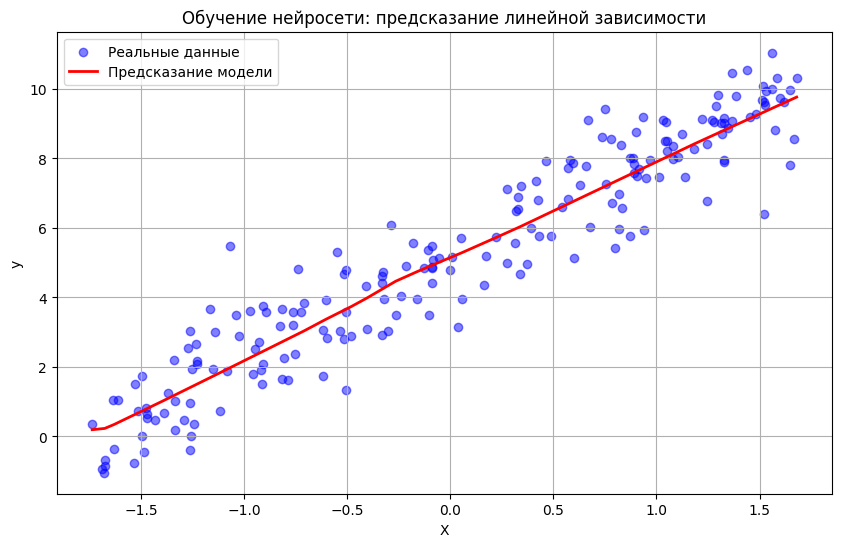

In [438]:
test_loss = mse(y_test, y_pred)
print(f"Test MSE: {test_loss:.4f}")

sorted_indices = np.argsort(X_test_scaled[:, 0])

plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[sorted_indices], y_test[sorted_indices], color='blue', alpha=0.5, label='Реальные данные')
plt.plot(X_test_scaled[sorted_indices], y_pred[sorted_indices], color='red', linewidth=2, label='Предсказание модели')
plt.title('Обучение нейросети: предсказание линейной зависимости')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## sin(x)

### Подготовка данных

In [439]:
X = np.random.rand(1000, 1) * 10
y = np.sin(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Выбор лучшей архитектуры


Обучение: 1x32x1
Epoch 10/1000, Loss: 0.3257
Epoch 20/1000, Loss: 0.2902
Epoch 30/1000, Loss: 0.2715
Epoch 40/1000, Loss: 0.2581
Epoch 50/1000, Loss: 0.2481
Epoch 60/1000, Loss: 0.2401
Epoch 70/1000, Loss: 0.2333
Epoch 80/1000, Loss: 0.2273
Epoch 90/1000, Loss: 0.2215
Epoch 100/1000, Loss: 0.2158
Epoch 110/1000, Loss: 0.2099
Epoch 120/1000, Loss: 0.2038
Epoch 130/1000, Loss: 0.1975
Epoch 140/1000, Loss: 0.1909
Epoch 150/1000, Loss: 0.1842
Epoch 160/1000, Loss: 0.1773
Epoch 170/1000, Loss: 0.1704
Epoch 180/1000, Loss: 0.1634
Epoch 190/1000, Loss: 0.1565
Epoch 200/1000, Loss: 0.1496
Epoch 210/1000, Loss: 0.1428
Epoch 220/1000, Loss: 0.1363
Epoch 230/1000, Loss: 0.1299
Epoch 240/1000, Loss: 0.1238
Epoch 250/1000, Loss: 0.1179
Epoch 260/1000, Loss: 0.1123
Epoch 270/1000, Loss: 0.1069
Epoch 280/1000, Loss: 0.1018
Epoch 290/1000, Loss: 0.0969
Epoch 300/1000, Loss: 0.0923
Epoch 310/1000, Loss: 0.0880
Epoch 320/1000, Loss: 0.0839
Epoch 330/1000, Loss: 0.0801
Epoch 340/1000, Loss: 0.0765
Epoch

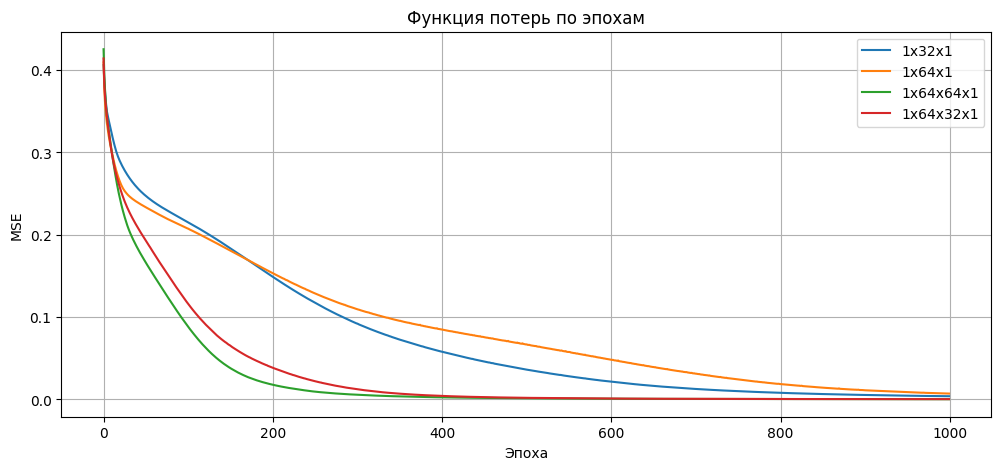

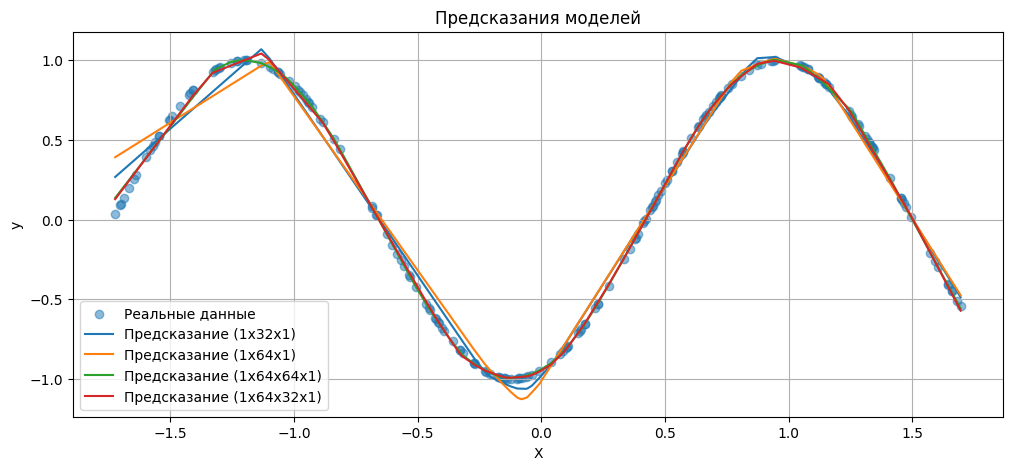

In [440]:
input_layer_size = X_train.shape[1]

architectures = {
    '1x32x1': [input_layer_size, 32, 1],
    '1x64x1': [input_layer_size, 64, 1],
    '1x64x64x1': [input_layer_size, 64, 64, 1],  
    '1x64x32x1': [input_layer_size, 64, 32, 1]
}

results = {}

for name, layer_sizes in architectures.items():
    print(f"\nОбучение: {name}")
    model = NeuralNetwork(layer_sizes, activation='relu', task='regression')
    losses = model.train(X_train_scaled, y_train, epochs=1000, batch_size=32, learning_rate=0.01)
    y_pred = model.predict(X_test_scaled)
    loss = mse(y_test, y_pred)
    
    key = f"{name}"
    results[key] = {
        'loss': loss,
        'losses': losses,
        'architecture': layer_sizes,
        'parameters': model.parameters 
    }
    print(f"Test MSE: {loss:.5f}")
    
plt.figure(figsize=(12, 5))
for name, res in results.items():
    plt.plot(res['losses'], label=name)

plt.title("Функция потерь по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

sorted_indices = np.argsort(X_test_scaled[:, 0])
X_test_sorted = X_test_scaled[sorted_indices]
y_test_sorted = y_test[sorted_indices]

plt.figure(figsize=(12, 5))
plt.scatter(X_test_sorted, y_test_sorted, alpha=0.5, label="Реальные данные")

for name, res in results.items():
    temp_model = NeuralNetwork(res['architecture'], activation='relu', task='regression')
    temp_model.parameters = res['parameters'] 
    
    y_pred = temp_model.predict(X_test_scaled)[sorted_indices]
    plt.plot(X_test_sorted, y_pred, label=f"Предсказание ({name})")

plt.title("Предсказания моделей")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Обучение и предсказание

In [441]:
best_model_name = min(results, key=lambda k: results[k]['loss'])
best_architecture = results[best_model_name]['architecture']
print(best_architecture)

model = NeuralNetwork(best_architecture, 
                      activation='relu',
                      task='regression')
loses = model.train(X_train_scaled, y_train, epochs=500, batch_size=32, learning_rate=0.01)

y_pred = model.predict(X_test_scaled)

[1, 64, 64, 1]
Epoch 10/500, Loss: 0.3225
Epoch 20/500, Loss: 0.2643
Epoch 30/500, Loss: 0.2311
Epoch 40/500, Loss: 0.2068
Epoch 50/500, Loss: 0.1868
Epoch 60/500, Loss: 0.1684
Epoch 70/500, Loss: 0.1509
Epoch 80/500, Loss: 0.1335
Epoch 90/500, Loss: 0.1169
Epoch 100/500, Loss: 0.1011
Epoch 110/500, Loss: 0.0865
Epoch 120/500, Loss: 0.0735
Epoch 130/500, Loss: 0.0625
Epoch 140/500, Loss: 0.0534
Epoch 150/500, Loss: 0.0459
Epoch 160/500, Loss: 0.0398
Epoch 170/500, Loss: 0.0348
Epoch 180/500, Loss: 0.0306
Epoch 190/500, Loss: 0.0271
Epoch 200/500, Loss: 0.0240
Epoch 210/500, Loss: 0.0213
Epoch 220/500, Loss: 0.0191
Epoch 230/500, Loss: 0.0170
Epoch 240/500, Loss: 0.0153
Epoch 250/500, Loss: 0.0137
Epoch 260/500, Loss: 0.0123
Epoch 270/500, Loss: 0.0111
Epoch 280/500, Loss: 0.0101
Epoch 290/500, Loss: 0.0091
Epoch 300/500, Loss: 0.0083
Epoch 310/500, Loss: 0.0076
Epoch 320/500, Loss: 0.0069
Epoch 330/500, Loss: 0.0064
Epoch 340/500, Loss: 0.0059
Epoch 350/500, Loss: 0.0054
Epoch 360/500,

### Визуализация

Test MSE: 0.0020


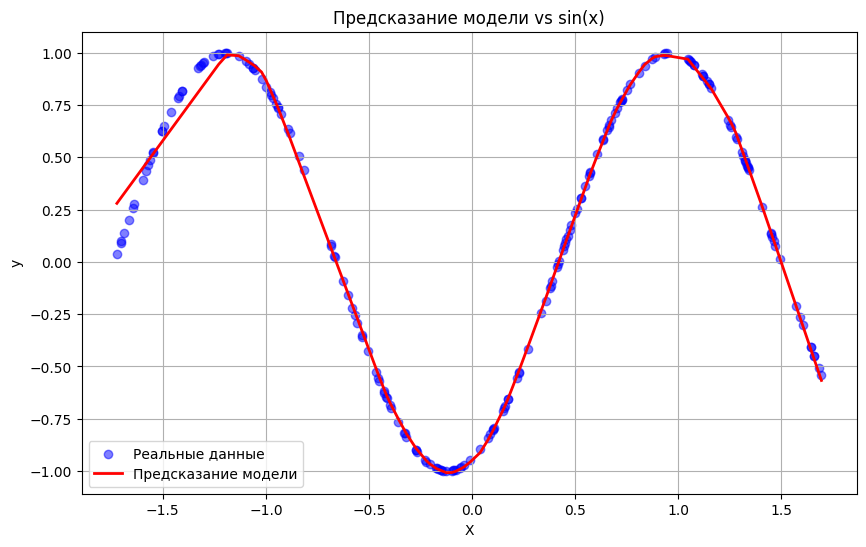

In [442]:
test_loss = mse(y_test, y_pred)
print(f"Test MSE: {test_loss:.4f}")

sorted_indices = np.argsort(X_test_scaled[:, 0])

plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[sorted_indices], y_test[sorted_indices], color='blue', alpha=0.5, label='Реальные данные')
plt.plot(X_test_scaled[sorted_indices], y_pred[sorted_indices], color='red', linewidth=2, label='Предсказание модели')
plt.title('Предсказание модели vs sin(x)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Оценка недвижимости

### Подготовка данных

In [443]:
features_train = [] 
prices = []         

with open('./dataset/property_price/preprocessed_data.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    
    featuresTitles = { key: [] for key in reader.fieldnames if key != 'SalePrice' }
    salePrices = []
    
    for row in reader:
        try:
            salePrice = float(row['SalePrice'])
            salePrices.append(salePrice)
            
            for feature in featuresTitles:
                featuresTitles[feature].append(float(row[feature]))
        except ValueError:
            continue

salePrices = np.array(salePrices)
featuresTitles = { key: np.array(values) for key, values in featuresTitles.items() }

correlations = {}
for feature, values in featuresTitles.items():
    valid_indices = ~np.isnan(values) 
    if np.any(valid_indices):
        correlation = np.corrcoef(values[valid_indices], salePrices[valid_indices])[0, 1]
        correlations[feature] = abs(correlation) 

best_feature = max(correlations, key=correlations.get)
print(f"Лучший признак: {best_feature} (корреляция: {correlations[best_feature]:.5f})")

with open('./dataset/property_price/preprocessed_data.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row[best_feature] == 'NA' or row['SalePrice'] == 'NA':
            continue
        
        best_feature_value = float(row[best_feature])
        sale_price = float(row['SalePrice'])
        
        features_train.append([best_feature_value])
        prices.append(sale_price)

features_train = np.array(features_train)
prices = np.array(prices).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    features_train, prices, 
    test_size=0.3, 
    random_state=42
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Лучший признак: OverallQual (корреляция: 0.81751)


### Обучение и предсказание

In [444]:
input_layer_size = x_train.shape[1]
model = NeuralNetwork([input_layer_size, 64, 64, 1], 
                      activation='relu',
                      task='regression')
loses = model.train(x_train, y_train, epochs=500, batch_size=32, learning_rate=0.01)

y_pred = model.predict(x_test)

Epoch 10/500, Loss: 0.0477
Epoch 20/500, Loss: 0.0463
Epoch 30/500, Loss: 0.0453
Epoch 40/500, Loss: 0.0426
Epoch 50/500, Loss: 0.0426
Epoch 60/500, Loss: 0.0427
Epoch 70/500, Loss: 0.0420
Epoch 80/500, Loss: 0.0419
Epoch 90/500, Loss: 0.0420
Epoch 100/500, Loss: 0.0432
Epoch 110/500, Loss: 0.0424
Epoch 120/500, Loss: 0.0418
Epoch 130/500, Loss: 0.0426
Epoch 140/500, Loss: 0.0419
Epoch 150/500, Loss: 0.0422
Epoch 160/500, Loss: 0.0423
Epoch 170/500, Loss: 0.0426
Epoch 180/500, Loss: 0.0417
Epoch 190/500, Loss: 0.0417
Epoch 200/500, Loss: 0.0418
Epoch 210/500, Loss: 0.0424
Epoch 220/500, Loss: 0.0426
Epoch 230/500, Loss: 0.0417
Epoch 240/500, Loss: 0.0417
Epoch 250/500, Loss: 0.0416
Epoch 260/500, Loss: 0.0420
Epoch 270/500, Loss: 0.0417
Epoch 280/500, Loss: 0.0425
Epoch 290/500, Loss: 0.0434
Epoch 300/500, Loss: 0.0438
Epoch 310/500, Loss: 0.0416
Epoch 320/500, Loss: 0.0420
Epoch 330/500, Loss: 0.0416
Epoch 340/500, Loss: 0.0418
Epoch 350/500, Loss: 0.0416
Epoch 360/500, Loss: 0.0418
E

### Визуализация

Test MSE: 0.0452


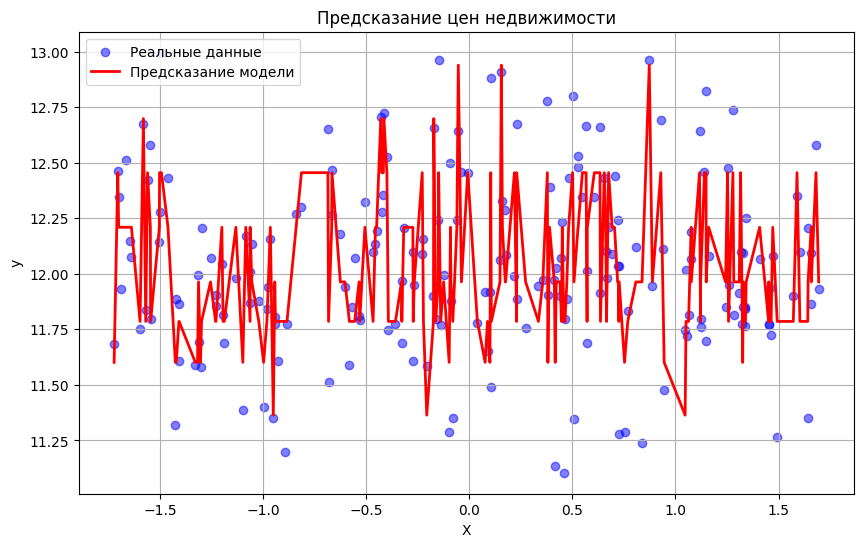

In [445]:
test_loss = mse(y_test, y_pred)
print(f"Test MSE: {test_loss:.4f}")

sorted_indices = np.argsort(X_test_scaled[:, 0])

plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[sorted_indices], y_test[sorted_indices], color='blue', alpha=0.5, label='Реальные данные')
plt.plot(X_test_scaled[sorted_indices], y_pred[sorted_indices], color='red', linewidth=2, label='Предсказание модели')
plt.title('Предсказание цен недвижимости')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Смертность на титанике

### Подготовка данных

In [446]:
features_train = []
prices = []

with open('./dataset/titanic/preprocessed_train.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    feature_titles = [key for key in reader.fieldnames if key != 'Survived']
    
    numerical_features = ['Age', 'Fare']
    selected_indices = [i for i, key in enumerate(feature_titles) if key in numerical_features]
    
    for row in reader:
        survived = float(row['Survived'])
        feature_values = [float(row[feature_titles[i]]) for i in selected_indices]
        
        features_train.append(feature_values)
        prices.append(survived)

features_train = np.array(features_train)
prices = np.array(prices).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    features_train, prices, 
    test_size=0.3, 
    random_state=42
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Обучение и предсказание

In [447]:
input_layer_size = x_train.shape[1]
model = NeuralNetwork([input_layer_size, 64, 64, 1], 
                      activation='sigmoid',
                      task='classification')
loses = model.train(x_train, y_train, epochs=500, batch_size=32, learning_rate=0.01)

y_pred = model.predict(x_test)

Epoch 10/500, Loss: -0.0000
Epoch 20/500, Loss: -0.0000
Epoch 30/500, Loss: -0.0000
Epoch 40/500, Loss: -0.0000
Epoch 50/500, Loss: -0.0000
Epoch 60/500, Loss: -0.0000
Epoch 70/500, Loss: -0.0000
Epoch 80/500, Loss: -0.0000
Epoch 90/500, Loss: -0.0000
Epoch 100/500, Loss: -0.0000
Epoch 110/500, Loss: -0.0000
Epoch 120/500, Loss: -0.0000
Epoch 130/500, Loss: -0.0000
Epoch 140/500, Loss: -0.0000
Epoch 150/500, Loss: -0.0000
Epoch 160/500, Loss: -0.0000
Epoch 170/500, Loss: -0.0000
Epoch 180/500, Loss: -0.0000
Epoch 190/500, Loss: -0.0000
Epoch 200/500, Loss: -0.0000
Epoch 210/500, Loss: -0.0000
Epoch 220/500, Loss: -0.0000
Epoch 230/500, Loss: -0.0000
Epoch 240/500, Loss: -0.0000
Epoch 250/500, Loss: -0.0000
Epoch 260/500, Loss: -0.0000
Epoch 270/500, Loss: -0.0000
Epoch 280/500, Loss: -0.0000
Epoch 290/500, Loss: -0.0000
Epoch 300/500, Loss: -0.0000
Epoch 310/500, Loss: -0.0000
Epoch 320/500, Loss: -0.0000
Epoch 330/500, Loss: -0.0000
Epoch 340/500, Loss: -0.0000
Epoch 350/500, Loss: -0

### Визуализация

Test MSE: 0.5858


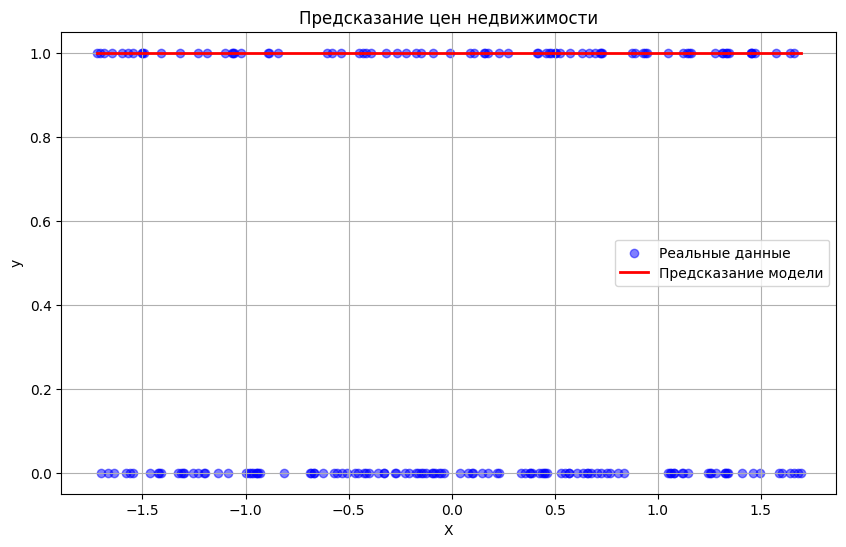

In [448]:
test_loss = mse(y_test, y_pred)
print(f"Test MSE: {test_loss:.4f}")

sorted_indices = np.argsort(X_test_scaled[:, 0])

plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[sorted_indices], y_test[sorted_indices], color='blue', alpha=0.5, label='Реальные данные')
plt.plot(X_test_scaled[sorted_indices], y_pred[sorted_indices], color='red', linewidth=2, label='Предсказание модели')
plt.title('Предсказание цен недвижимости')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

